<a href="https://colab.research.google.com/github/giridharanSSK/GordOPK/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
#Load dataset
data = pd.read_csv('ecommerce_data.csv', encoding='latin1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [11]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


# Task
Perform data cleaning and preparation on the `ecommerce_data.csv` dataset by handling missing values in `CustomerID` and `Description`, filtering out rows with non-positive `Quantity` or `UnitPrice`, and converting `InvoiceDate` to datetime. Then, create a `TotalPrice` feature, scale the `Quantity` column using `StandardScaler`, and visualize its distribution with a histogram to understand the scaled purchase sizes. Finally, summarize the preparation steps and distribution insights, and ask for further analysis.

## Data Cleaning and Preparation

### Subtask:
Handle missing values, filter out non-positive quantities and unit prices, and convert InvoiceDate to datetime.


**Reasoning**:
The subtask requires handling missing values, filtering non-positive quantities and unit prices, and converting the 'InvoiceDate' column to a datetime object. These operations can be efficiently performed in a single code block.



In [12]:
data.dropna(subset=['CustomerID'], inplace=True)
data.dropna(subset=['Description'], inplace=True)
data = data[data['Quantity'] > 0]
data = data[data['UnitPrice'] > 0]
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB
None
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


## Feature Engineering

### Subtask:
Create a new column `TotalPrice` by multiplying `Quantity` and `UnitPrice` to represent the total value of each item in a transaction.


**Reasoning**:
The subtask requires creating a new column 'TotalPrice' by multiplying the 'Quantity' and 'UnitPrice' columns. This can be achieved by a direct element-wise multiplication of these two columns.



In [13]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  


**Reasoning**:
The subtask requires scaling the `Quantity` column using `StandardScaler`. This involves initializing the scaler, fitting it to the `Quantity` data, and then transforming the column. The transformed data will be stored in a new column named `ScaledQuantity`.



In [14]:
scaler = StandardScaler()
data['ScaledQuantity'] = scaler.fit_transform(data[['Quantity']])
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34   

   ScaledQuantity  
0       -0.038968  
1       -0.038968  
2       -0.027816  
3       -0.038968  
4       -0

**Reasoning**:
To visualize the distribution of the `ScaledQuantity` column, a histogram is an appropriate choice. This will help in understanding the spread and shape of the scaled purchase sizes.



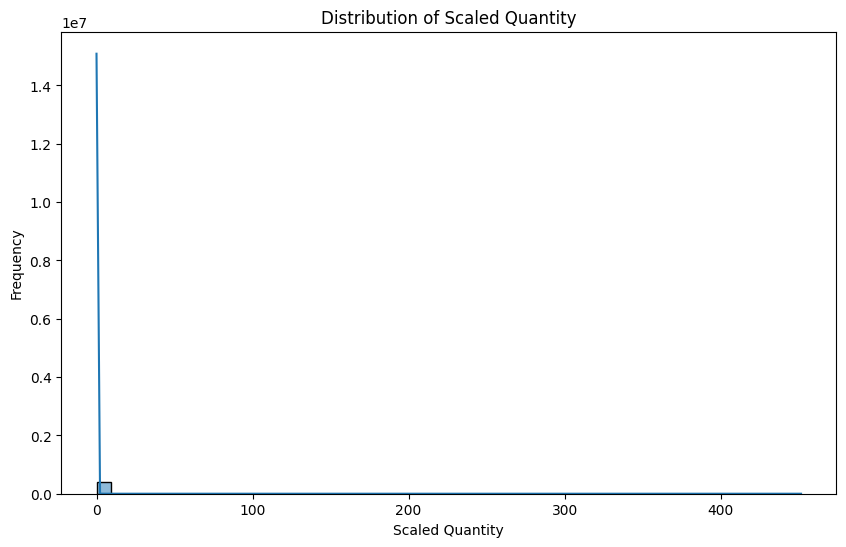

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['ScaledQuantity'], bins=50, kde=True)
plt.title('Distribution of Scaled Quantity')
plt.xlabel('Scaled Quantity')
plt.ylabel('Frequency')
plt.show()


## Summary of Data Preparation and Insights

**Data Cleaning and Preparation:**
- Missing values in `CustomerID` (135,080 entries) and `Description` (1,454 entries) were removed.
- Rows with non-positive `Quantity` or `UnitPrice` were filtered out, ensuring valid transaction data.
- The `InvoiceDate` column was successfully converted to a datetime object, enabling time-series analysis.
- The dataset now contains 397,884 entries with no missing values in the processed columns.

**Feature Engineering:**
- A new feature, `TotalPrice`, was created by multiplying `Quantity` and `UnitPrice`, providing the total revenue for each item in a transaction.
- The `Quantity` column was scaled using `StandardScaler` to `ScaledQuantity`. This transformation centers the data around zero with a unit variance, making it suitable for models sensitive to feature scales.

**Distribution of Scaled Quantity:**
- The histogram of `ScaledQuantity` shows a distribution heavily concentrated around zero, with a long tail extending to the right. This indicates that most transactions involve a relatively small number of items, while a few transactions involve a significantly larger quantity. The scaling process effectively standardized these values, making their magnitudes comparable.

This concludes the data cleaning, preparation, feature engineering, and initial visualization as outlined in the task.

**What further analysis would you like to perform next?** For example, you might want to perform RFM analysis, clustering, or build a predictive model.

## Final Task

### Subtask:
Summarize the data preparation steps and the insights gained from the distribution plot, then inquire about further analysis the user might want to perform.


## Summary:

### Q&A
The user is prompted to consider further analysis such as RFM analysis, clustering, or building a predictive model.

### Data Analysis Key Findings
*   **Data Cleaning and Preparation**:
    *   Missing values in `CustomerID` and `Description` were removed. Specifically, 135,080 entries with missing `CustomerID` and 1,454 entries with missing `Description` were handled.
    *   Rows with non-positive `Quantity` or `UnitPrice` were filtered out, reducing the dataset to 397,884 entries.
    *   The `InvoiceDate` column was successfully converted to a datetime object.
    *   The cleaned dataset now contains 397,884 entries with no missing values in the processed columns.
*   **Feature Engineering**:
    *   A new feature, `TotalPrice`, was created by multiplying `Quantity` and `UnitPrice`.
    *   The `Quantity` column was scaled using `StandardScaler` to create `ScaledQuantity`, which centers the data around zero with a unit variance.
*   **Distribution of Scaled Quantity**:
    *   The histogram of `ScaledQuantity` reveals a distribution heavily concentrated around zero, with a long right tail. This indicates that most transactions involve relatively small quantities, while a few transactions involve significantly larger quantities.

### Insights or Next Steps
*   The data is now clean and prepared, with relevant features engineered, making it ready for advanced analytical tasks.
*   The user should consider performing RFM (Recency, Frequency, Monetary) analysis, customer clustering, or building predictive models based on the cleaned and engineered dataset.
